# 🌳 Decision Tree Classifier from Shelf
This notebook implements a complete Decision Tree Classifier using the sklearn libary.

The aim is a comparison with the from scratch implementation.

The final section demonstrates proper model evaluation using the Confusion Matrix and Classification Report.

## Setup environment enabling self-contained running

In [ ]:
!git clone https://github.com/MarkusMitteregger/ML_Assessment_2.git
import os
os.chdir("ML_Assessment_2")

### Setup and Library Imports
We start by importing the necessary libraries. We will use `pandas` for data handling and `sklearn` for model training and predictions.

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Implement Decision Tree
The data preparation as well as the splitting of the dataset with the library is much easier than with the form scratch code.

With the same max depth, the model performs better with entropy as its criterion rather than gini

In [6]:
csv_file_path = 'dataset/dataset.csv' 
# Load the dataset using pandas
df = pd.read_csv(csv_file_path)

# Clean up column names: remove leading/trailing whitespace.
df.columns = df.columns.str.strip()

# --- Machine Learning Steps ---

# 1. Prepare the data
# The 'Disease' column is our target (y), the rest are features (X).
X = df.drop('Disease', axis=1)
y = df['Disease']
print('Now', X.head())
print(y.head())

# The Decision Tree in scikit-learn needs all feature columns to be numeric.
# We can use LabelEncoder to convert any non-numeric columns if they exist.
for col in X.columns:
    if X[col].dtype == 'object': 
        le = LabelEncoder() 
        X[col] = le.fit_transform(X[col]) #

print('transformed X:', X.head())  # Print first few rows of features to verify

# 2. Split the data into a training set and a testing set
# We train the model on the training set and evaluate it on the testing set.
# test_size=0.2 means 20% of the data is for testing, 80% for training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train the model
# We create an instance of the DecisionTreeClassifier.
model = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=20, min_samples_split=7)
# We train it using our training data.
model.fit(X_train, y_train)

Now     Symptom_1              Symptom_2              Symptom_3  \
0     itching              skin_rash   nodal_skin_eruptions   
1   skin_rash   nodal_skin_eruptions    dischromic _patches   
2     itching   nodal_skin_eruptions    dischromic _patches   
3     itching              skin_rash    dischromic _patches   
4     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symptom_14 Symptom_15  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN

,criterion,'entropy'
,splitter,'best'
,max_depth,20
,min_samples_split,7
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Predictions

In [7]:
predictions = model.predict(X_test)

# Evaluation metrics
I use the Confusion Matrix to identify True Positives, False Positives and False Negatives, which are critical for clinical decision-making. The matrix results are used to generate the Accuracy and Classification Report (Precision, Recall).
The Recall metric has a high relevance for medical applications.


--- Model Evaluation ---
Model Accuracy: 1.00

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Co

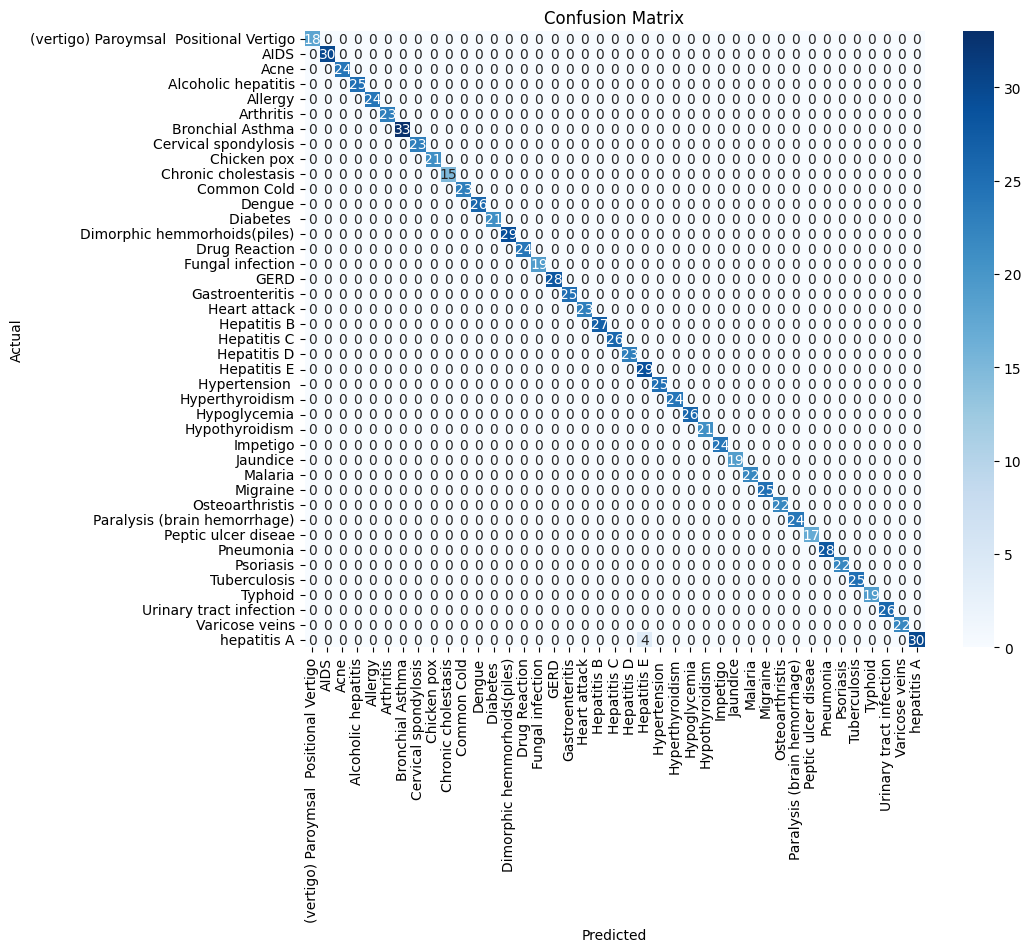

In [11]:
# --- NEW: Evaluation with Confusion Matrix and Classification Report ---
print("\n--- Model Evaluation ---")

# 1. Print Accuracy Score
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy:.2f}")

# 2. Print Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# 3. Print Confusion Matrix
print("\nConfusion Matrix:")
labels = sorted(np.unique(y_test))
cm = confusion_matrix(y_test, predictions, labels=labels)
print(cm)

# Optional: Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()